### House Price Prediction

In [99]:
import pandas as pd 
import numpy as np 
import pickle
import scipy.stats as stats
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
sns.set()

In [60]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [61]:
boston = load_boston()

In [62]:
type(boston)

sklearn.utils.Bunch

In [63]:
bos= pd.DataFrame(boston.data)

In [64]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [65]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [66]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [67]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [68]:
boston.filename

'C:\\Users\\Tarun\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv'

In [69]:
boston.target.shape

(506,)

In [70]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [71]:
boston.data.shape

(506, 13)

In [72]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [73]:
bos.columns = boston.feature_names

In [74]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [75]:
bos['MEDV'] =boston.target

In [76]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [77]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [78]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002ABB9D74548>,
      dtype=object)

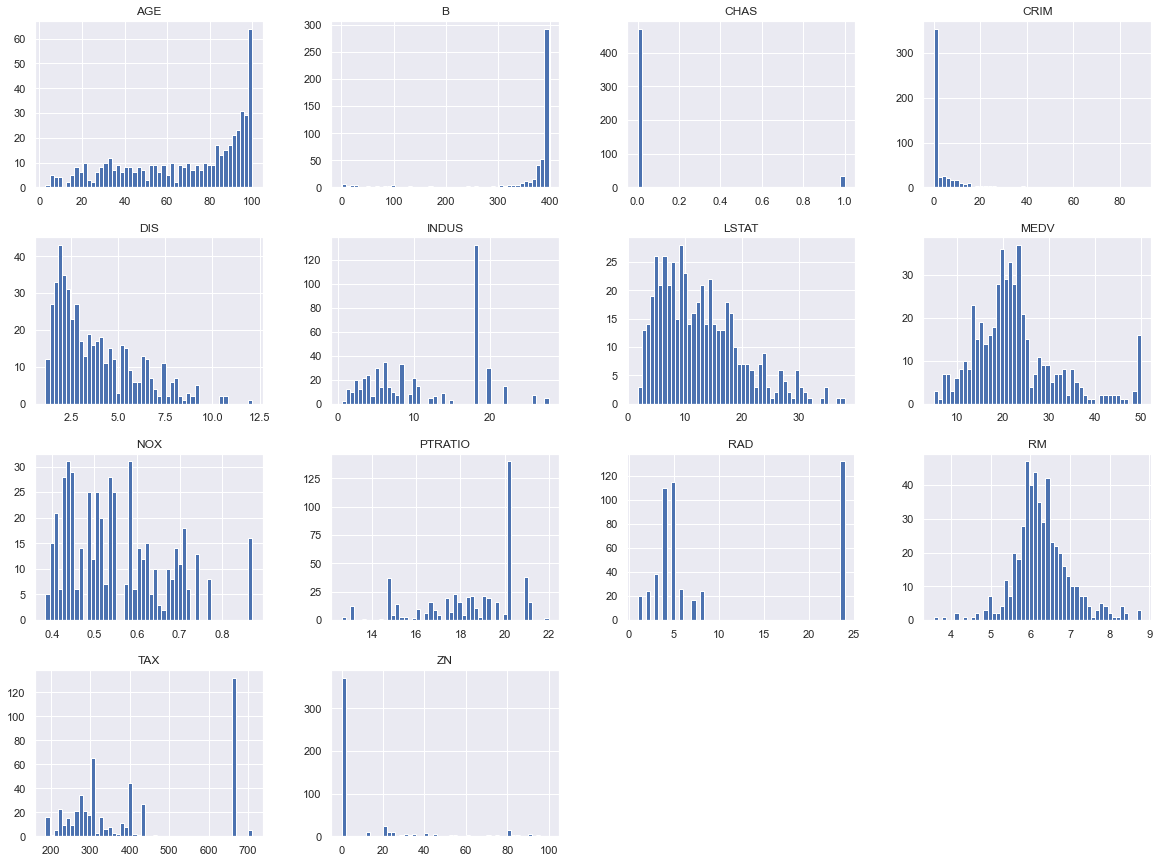

In [79]:
bos.hist(bins=50, figsize=(20, 15))

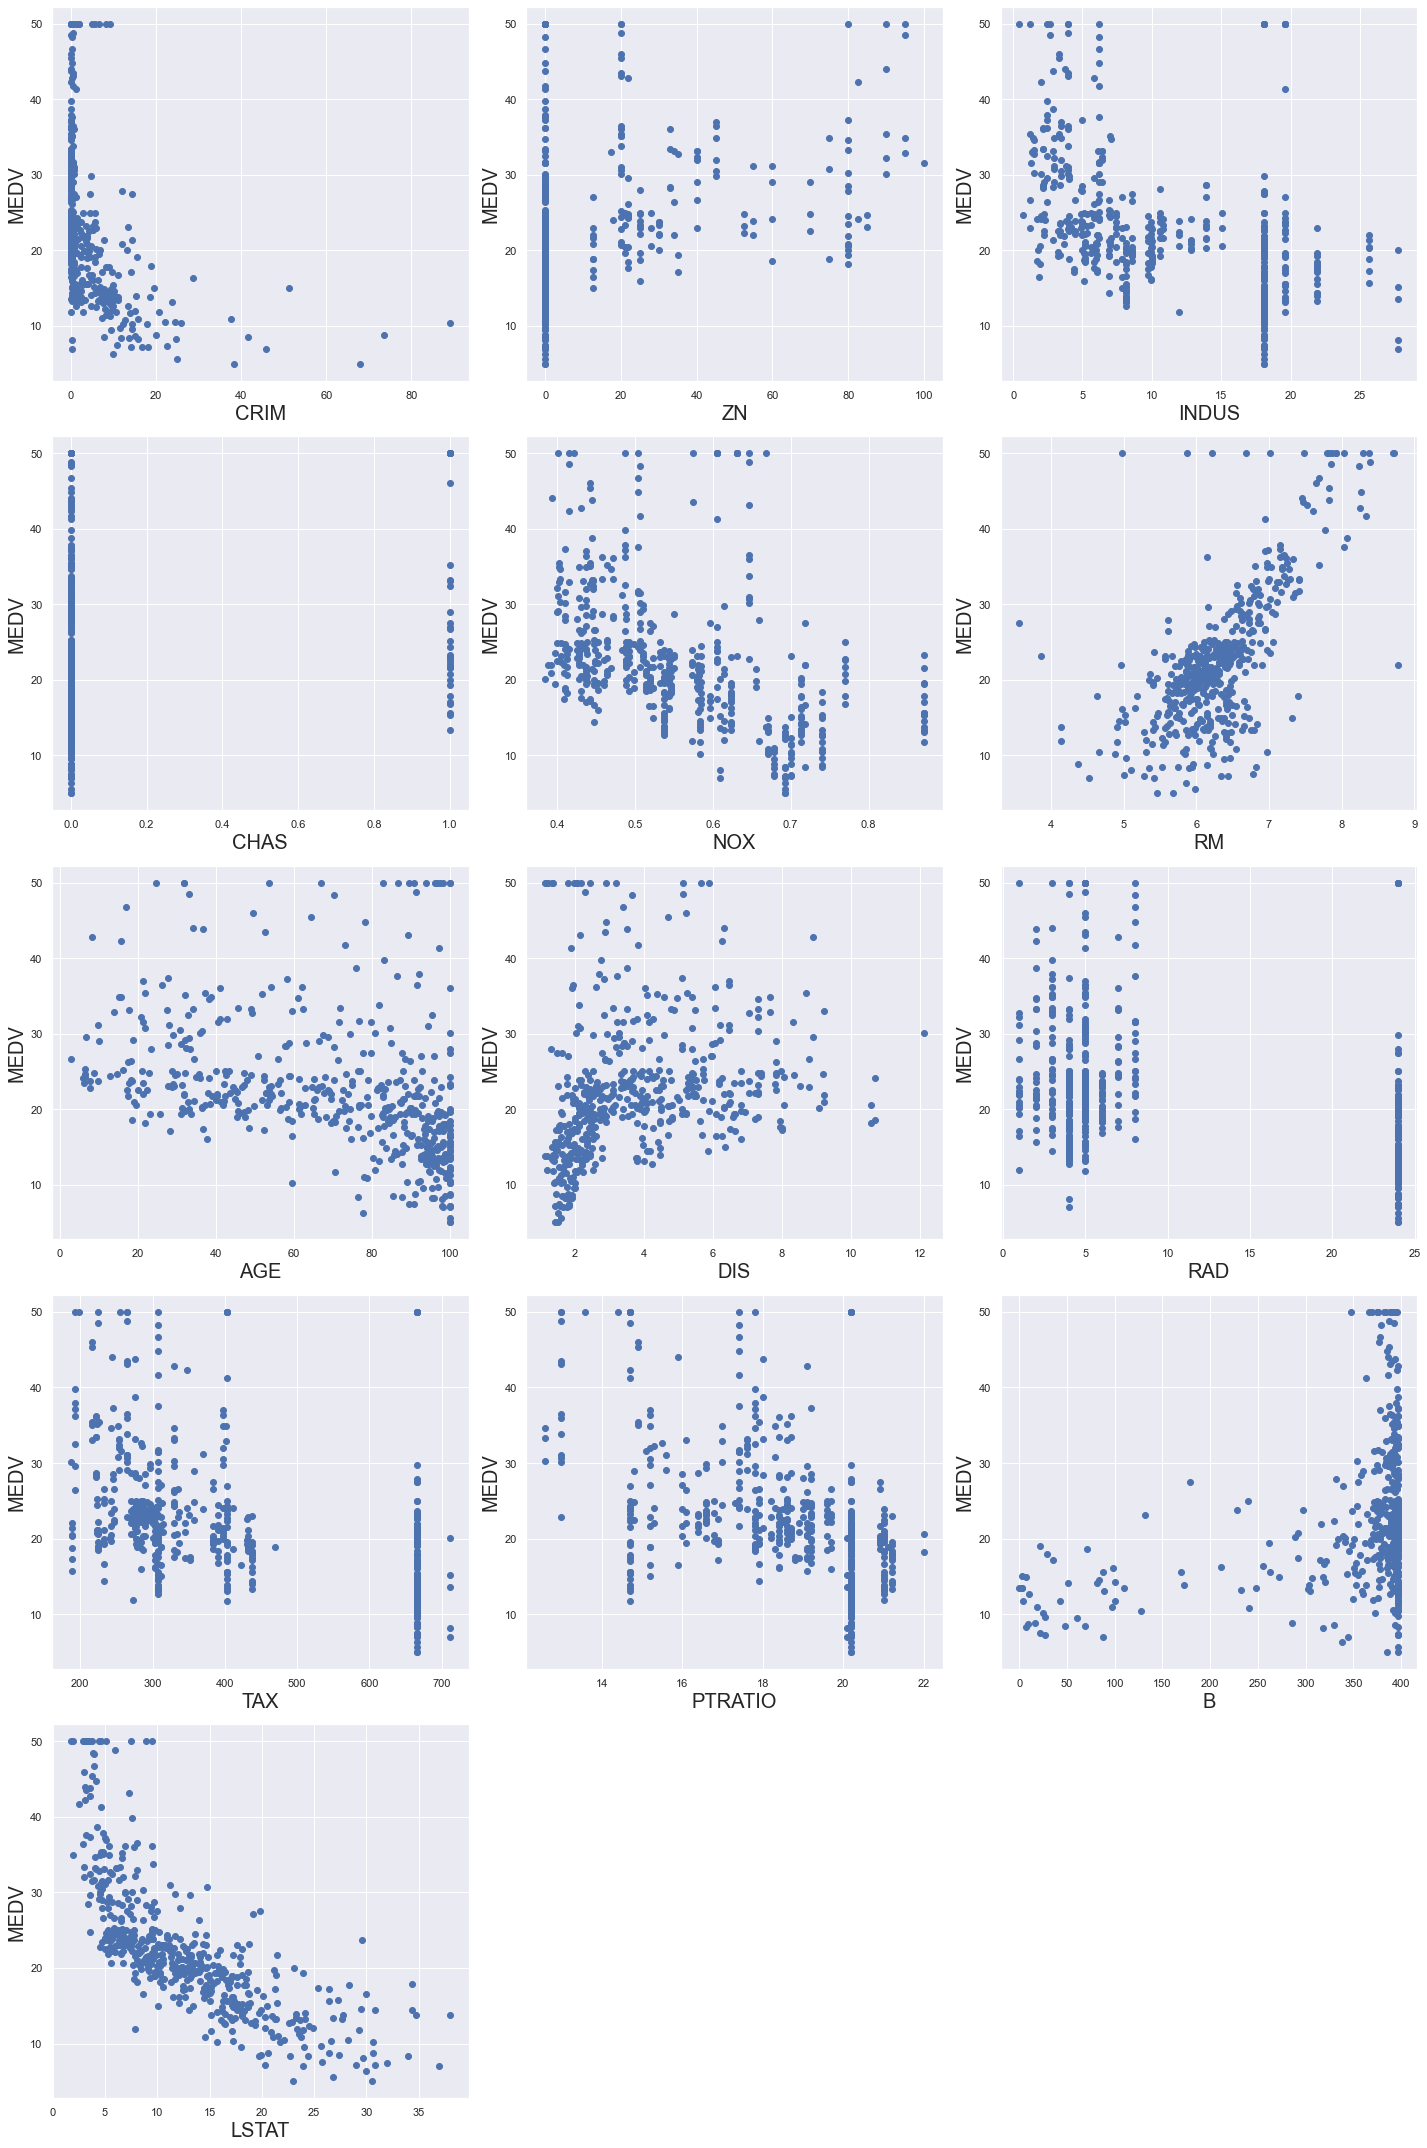

In [80]:
# Looking scatter plot by dividing total dataset
y = bos['MEDV']
X = bos.drop(columns = ['MEDV'])
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('MEDV',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Relationship between the dependent and some independent variables look linear.

In [81]:
# Splitting dataset in train and test set
# x_train - features of train set
# y_train - label of train set
# x_test - features of test set
# y_test - label of test set
train_set, test_set  = train_test_split(bos, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [82]:
# suppose, By discussion with team we get know that 'CHAS' is important feature of dataset, so we are dividing dataset 
# as train and test both have each value of 'CHAS'
bos['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [83]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(bos, bos['CHAS']):
    strat_train_set = bos.loc[train_index]
    strat_test_set = bos.loc[test_index]

In [84]:
print(f"Rows in train set: {len(strat_train_set)}\nRows in test set: {len(strat_test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [85]:
strat_train_set['CHAS'].value_counts()

0.0    376
1.0     28
Name: CHAS, dtype: int64

In [86]:
strat_test_set['CHAS'].value_counts()

0.0    95
1.0     7
Name: CHAS, dtype: int64

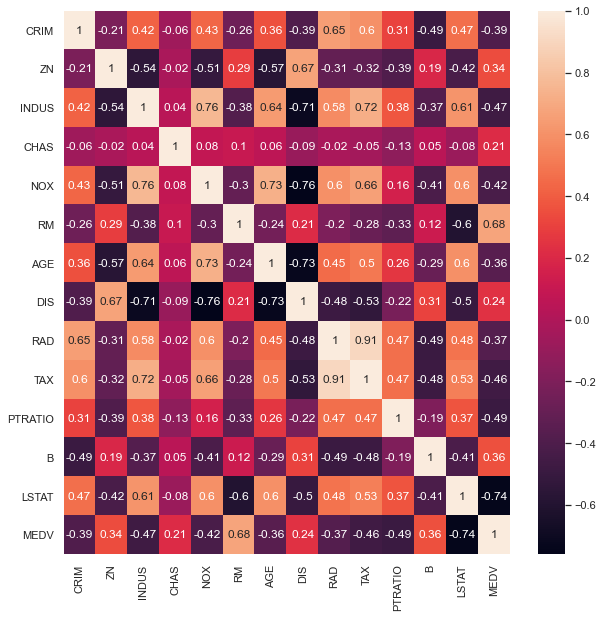

In [87]:
# Looking for correlation
correlation_matrix = strat_train_set.corr().round(2)
plt.subplots(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True)

* The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

* To fit a linear regression model, we select those features which have high correlation with target variable(MEDV). 

* Correlation matrix shows that 'RM' has strong positive correlation with 'MEDV'(0.68) and  'LSTAT' has strong negative correlation with 'MEDV'(-0.74). 

* To select features for linear regression model is to check multi-co-linearity. 

* 'RAD' and 'TAX' have correlation of 0.91 means these are strongly correlated to each other.
* Same for the features 'DIS' and 'AGE' which have correlation of -0.73.

* Same for the features 'DIS' and 'NOX' which have correlation of -0.76 etc.

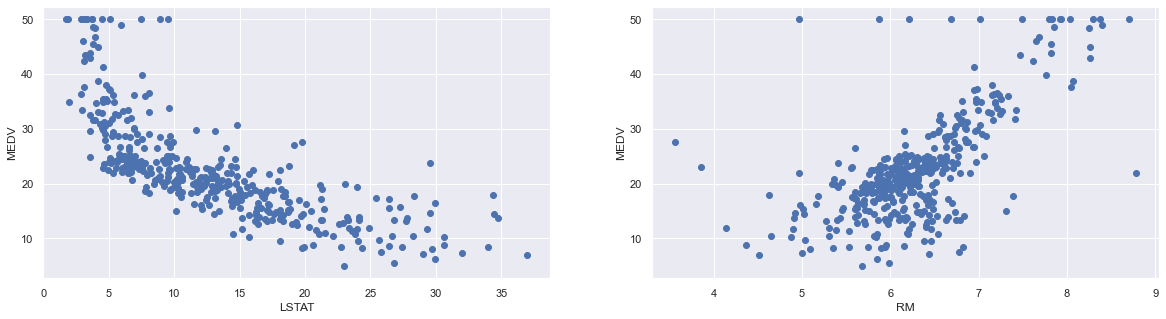

In [88]:
# Looking correlation of 'LSTAT'and 'RM' with 'MEDV' using scatter plots
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = strat_train_set['MEDV']
for i , col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = strat_train_set[col]
    y = target
    plt.scatter(x,y,marker='o')
    plt.xlabel(col)
    plt.ylabel('MEDV')

* As shown, the prices increases as value of 'RM' increases linearly and there are few outliers. The data seems to be capped at 50.

* The price tend to decrease with increase in 'LSTAT'. Though it doesn’t look to be following exactly a linear line.

In [89]:
# seprating features and labels
bos_features = strat_train_set.drop("MEDV", axis=1)
bos_labels = strat_train_set["MEDV"].copy()

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler())
])

In [91]:
bos_train_tr = my_pipeline.fit_transform(bos_features)

In [92]:
bos_train_tr.shape

(404, 13)

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = bos_train_tr
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X.columns
vif

,VIF,Features
0,1.982817,CRIM
1,2.306419,ZN
2,4.066415,INDUS
3,1.070841,CHAS
4,4.449107,NOX
5,1.841152,RM
6,2.944491,AGE
7,3.881666,DIS
8,7.705269,RAD
9,9.247768,TAX


* VIF values for all the feature are calculated. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We have VIF value greater than 5 for RAD and TAX.


In [100]:
# Fitting linear regression the model
# regression = LinearRegression()
# regression.fit(bos_train_tr, bos_labels)

regression = RandomForestRegressor()
regression.fit(bos_train_tr, bos_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [101]:
# To check manually pediction, selection some features
some_data = bos_features.iloc[:5]

In [102]:
# To check manually pediction, selection some label
some_labels = bos_labels.iloc[:5]

In [103]:
# Using pipeline for sample data
prepared_data = my_pipeline.transform(some_data)

In [104]:
# Predicting values from prepared data
regression.predict(prepared_data)

array([22.395, 25.523, 16.412, 23.275, 23.692])

In [105]:
list([some_labels])

[254    21.9
 348    24.5
 476    16.7
 321    23.1
 326    23.0
 Name: MEDV, dtype: float64]

In [106]:
# bos_train_tr - after pipeline
regression.score(bos_train_tr,bos_labels)

0.9827976937232862

In [107]:
adj_r2(bos_train_tr,bos_labels)

0.9822242835140624

Our r2 score is 73.45% and adj r2 is 72.57% for our training set, so looks like we are not being penalized by use of any feature.

Let's check how well model fits the test data.

and let's check if our model is overfitting our data using regularization.

In [108]:
# Testing the model on test data
bos_test_features = strat_test_set.drop('MEDV', axis=1)
bos_test_labels = strat_test_set['MEDV'].copy()
test_prepared  = my_pipeline.transform(bos_test_features)
final_predictions = regression.predict(test_prepared)

In [109]:
final_predictions

array([24.774, 11.258, 26.14 , 21.856, 19.098, 15.088, 19.854, 14.695,
       32.711, 41.258, 20.117, 12.099, 23.767, 25.588, 19.651, 11.12 ,
       32.105, 14.378, 23.685, 18.238, 20.342, 17.482, 17.061, 22.288,
       18.862, 31.549, 16.02 , 33.085,  8.586, 33.622, 23.988, 21.408,
       22.732, 10.624, 20.551, 10.9  , 42.769, 24.443, 24.01 , 42.103,
       24.189, 29.273, 20.242, 20.429, 18.331, 33.68 , 44.165, 20.352,
       20.183, 22.029, 21.864, 14.46 , 21.636, 15.034, 25.159, 32.267,
       42.222, 29.837, 19.681, 20.701, 47.38 ,  9.436, 19.212, 25.004,
       14.673, 33.543, 19.758, 17.729, 18.837, 34.445, 25.852, 22.816,
       21.51 , 22.246, 35.024, 12.873, 16.174, 20.027, 20.806, 21.386,
       22.586, 20.839, 14.35 , 22.426, 20.356, 21.371, 14.611, 21.017,
       21.564, 23.077, 18.765, 27.18 ,  7.298, 26.376, 18.586, 29.235,
       20.111, 31.381, 14.107, 27.53 , 21.068, 20.311])

In [110]:
bos_test_labels

342    16.5
379    10.2
223    30.1
219    23.0
48     14.4
       ... 
88     23.6
466    19.0
52     25.0
121    20.3
218    21.5
Name: MEDV, Length: 102, dtype: float64

In [111]:
# test_prepared - data after pipleline
regression.score(test_prepared,bos_test_labels)

0.8777362685956683

In [112]:
adj_r2(test_prepared,bos_test_labels)

0.8596745810018466

So it looks like our model r2 score of test data is approx as train data.

In [139]:
# saving the model to the local file system
filename = 'finalized_model.sav'
pickle.dump(regression, open(filename, 'wb'))

In [152]:
# predicting using the saved model
# for record no. 2
loaded_model = pickle.load(open(filename, 'rb'))
a = loaded_model.predict(my_pipeline.transform([[0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67]]))
a

array([43.542])

In [150]:
# for record no. 505
v = loaded_model.predict([[0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67]])
v

array([22.453])

In [142]:
bos.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [143]:
a = loaded_model.predict(my_pipeline.fit_transform([[3,5,3,1,6,9,2,9,56,78,45,67,22]]))
a

array([20.82])

In [144]:
a =my_pipeline.transform([[0.06263, 0.0, 11, 1.0, 0.573, 6,69.1,2,1.0,273,12.0,391.99,9.67]])
regression.predict(a)

array([43.542])

In [145]:
prepared_data = my_pipeline.transform([[0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57]])

In [146]:
regression.predict(prepared_data)

array([27.89])

In [147]:
strat_train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0.0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1.0,0.871,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0.0,0.614,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0.0,0.713,6.525,86.5,2.4358,24.0,666.0,20.2,50.92,18.13,14.1
